# Bayesian biodiversity: PREDICTS data exploration

### TODO
- Number formatting
- Color palettes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List

In [44]:
# Load black for formatting
import jupyter_black

jupyter_black.load()

# Adjust display settings for pandas
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

## Metadata description

**Identifiers**
- `_id`: ?
- `Source_ID`: ID for the Data Source. Unique.
- `Reference`: Reference for the Data Source in the main text.
- `Study_number`: Between 1 and n for n Studies within Data Source. 
- `Study_name`: Unique within Source_ID. 
- `Block`: Within a Study either: Empty for all Sites / Non-empty for all Sites and at least two different values among Sites.
- `Site_number`: Between 1 and n for n Sites within Study. Unique within Study.
- `Site_name`: Unique within Study. Where requested by data providers, the names of some Sites have been replaced with 'Site ' + Site_number.
- `SS`: Concatenation of Source_ID and Study_number.
- `SSS`: Concatenation of Source_ID, Study_number and Site_number.
- `SSB`: Concatenation of Source_ID, Study_number and Block.
- `SSBS`: Concatenation of Source_ID, Study_number, Block and Site_number.
<br>

**Geography**
- `Longitude`: Where requested by data providers, the coordinates for some Sites have been removed from the data extract.
- `Latitude`: Where requested by data providers, the coordinates for some Sites have been removed from the data extract.
- `Coordinates_method`: One of: "Direct from publication / author" / "Georeferenced".
- `Country`: Coordinates matched to a World Borders GIS polygon.
- `Country_distance_metres`: If zero, Site latitude and longitude were within the matching World Borders 0.3 (Thematic Mapping 2008) GIS polygon. If greater than zero, the value is the distance in metres to the nearest WorldBorders GIS polygon.
- `UN_region`: Coordinates matched to a World Borders GIS polygon.
- `UN_subregion`: Coordinates matched to a World Borders GIS polygon.
<br>

**Biogeography**
- `Realm`: Coordinates matched to an ecoregions GIS polygon.
- `Biome`: Coordinates matched to an ecoregions GIS polygon.
- `Ecoregion`: Coordinates matched to an ecoregions GIS polygon.
- `Ecoregion_distance_metres`: If zero, Site latitude and longitude were within the matching Terrestrial ecoregions of the world (The Nature Conservancy 2009) GIS polygon. If greater than zero, the value is the distance in metres to the nearest ecoregions GIS polygon.
- `Wilderness_area`: Coordinates matched to a high biodiversity wilderness areas (Mittermeier et al. 2003) GIS polygon. Empty if Site did not fall within a wilderness area polygon.
- `Hotspot`: Coordinates matched to a biodiversity hotspots (Conservation International Foundation 2011) GIS polygon. Empty if Site did not fall within a hotspot polygon.
<br>

**Study scope**
- `Study_common_taxon`: The Kingdom, Phylum, Class, Order, Family, Genus or Species that is common to all taxa within this Study. Empty for Studies that examined taxa in multiple kingdoms.
- `Rank_of_study_common_taxon`: The lowest taxonomic Rank that is common to all taxa within this Study. Empty for Studies that examined taxa in multiple kingdoms.
<br>

**Sampling approach**
- `Sample_start_earliest`: In the form YYYY-MM-DD. 
- `Sample_end_latest`: In the form YYYY-MM-DD. Value greater than or equal to Sample_start_earliest.
- `Sample_midpoint`: Mid-point of Sample_start_earliest and Sample_end_latest. 
- `Sample_date_resolution`: One of: day / month / year
- `Sampling_method`
- `Sampling_effort`: In units given in Sampling_effort_unit. Where sampling effort did not vary among sites within a study, we set the Sampling_effort to 1. If present a value greater than zero.
- `Rescaled_sampling_effort`: Sampling effort rescaled to be between 0 and 1 within the Study i.e., Sampling_effort / max(Sampling_effort for this Study). If present a value greater than zero.
- `Sampling_effort_unit`: In units given in Sampling_effort_unit. Where sampling effort did not vary among sites within a study, we set the Sampling_effort to 1.
- `Max_linear_extent_metres`: The maximum linear extent of sampling in metres.
- `Transect_details`: Free text. Where requested by data providers, the transect details of some Sites have been removed from the data extract.
<br>

**Taxonomy**
- `Taxon`: Matching taxon in the Catalogue of Life 2013 checklist.
- `Taxon_number`: Between 1 and n for n taxa within Study.
- `Taxon_name_entered`: Name of the taxon as provided by the data contributor.
- `Parsed_name`: The result of parsing Taxon_name_entered.
- `Best_guess_binomial`: COL did not recognize all of the Latin binomials that were given to us so we employed the following scheme: The value of the Species column if Rank contains 'Species'. The first two words of the Species column if Rank contains 'Infraspecies'. The first two words of the Parsed_name column if Rank contains neither 'Infraspecies' nor 'Species' and Parsed_name contains two or more words. Empty in other cases.
- `COL_ID`: The ID of Taxon in COL (Catalogue of Life). 
- `Kingdom`: From COL.
- `Phylum`: From COL.
- `Class`: From COL.
- `Order`: From COL.
- `Family`: From COL.
- `Genus`: From COL.
- `Species`: From COL.
- `Higher_taxon`: The higher-taxonomic group that this taxon belongs to.
- `Indication`: A free-text description of the higher taxonomic group of this taxon.
- `Name_status`: From COL.
- `Rank`: From COL.
<br>

**Diversity metrics**
- `Diversity_metric_type`: One of: Abundance / Occurrence / Species richness"
- `Diversity_metric`
- `Diversity_metric_is_effort_sensitive`
- `Diversity_metric_is_suitable_for_Chao`
- `Diversity_metric_unit`
- `Measurement`: The biodiversity measurement of the Taxon at the Site in the Study, in units of Diversity_metric_unit.
- `Effort_corrected_measurement`: Where Diversity_metric_is_effort_sensitive is TRUE, the biodiversity measurement corrected for sampling effort (i.e., Measurement / Rescaled_sampling_effort). Where Diversity_metric_is_effort_sensitive is FALSE, the same value as Measurement.

**Habitat / land use**
- `Predominant_land_use`: One of: Primary vegetation / Young secondary vegetation / Intermediate secondary vegetation / Mature secondary vegetation / Secondary vegetation (indeterminate age) / Plantation forest / Pasture / Cropland / Urban / Cannot decide.
- `Source_for_predominant_land_use`: One of: Direct from publication or author / Google maps. May be empty for data collated before this information was captured
- `Use_intensity`: One of: Minimal use / Light use / Intense use / Cannot decide.
- `Habitat_as_described`: Free text description of habitat. Where requested by data providers, the habitat descriptions of some Sites have been removed from the data extract.
- `Habitat_patch_area_square_metres`: Habitat_patch_area expressed in square metres.
- `Km_to_nearest_edge_of_habitat`: Distance in km to the nearest edge of habitat supporting high diversity. A negative value indicates that the Site was within the high-diversity habitat
- `Years_since_fragmentation_or_conversion`: Years since fragmentation or conversion to present land cover (Primary habitat) or since start of recovery (Secondary habitat).

## 2016 release

https://data.nhm.ac.uk/dataset/the-2016-release-of-the-predicts-database-v1-1

**Summary**
- 3,278,056 measurements
- 26,194 sampling locations
- 94 countries
- 47,089 species
- Based on 480 studies

In [3]:
# Load the original predicts data
df_predicts_orig = pd.read_csv("../../data/PREDICTS/PREDICTS_2016/data.csv")

/var/folders/pd/qpp_vpcn3wv209_68c5q1_r80000gn/T/ipykernel_78208/2598404666.py:2: DtypeWarning: Columns (3,22,62,66) have mixed types. Specify dtype option on import or set low_memory=False.
  df_predicts_orig = pd.read_csv("../../data/PREDICTS/PREDICTS_2016/data.csv")


In [4]:
df_predicts_orig.shape

(3278056, 68)

## 2022 release of additional data

https://data.nhm.ac.uk/dataset/release-of-data-added-to-the-predicts-database-november-2022

**Summary**
- 1,040,752 measurements
- 9,544 sampling locations
- 46 countries
- 10,635 species
- Based on 115 studies

In [5]:
# Load the new 2022 predicts data
df_predicts_new = pd.read_csv("../../data/PREDICTS/PREDICTS_2022/data.csv")

/var/folders/pd/qpp_vpcn3wv209_68c5q1_r80000gn/T/ipykernel_78208/1272704116.py:2: DtypeWarning: Columns (3,20,23,50,66,70) have mixed types. Specify dtype option on import or set low_memory=False.
  df_predicts_new = pd.read_csv("../../data/PREDICTS/PREDICTS_2022/data.csv")


In [6]:
df_predicts_new.shape

(1040752, 72)

## Merge 2016 and 2022 data

In [7]:
# Find out if there are any columns that are not overlapping
unique_2016 = list(set(df_predicts_orig.columns) - set(df_predicts_new.columns))
unique_2022 = list(set(df_predicts_new.columns) - set(df_predicts_orig.columns))
print(unique_2016)
print(unique_2022)

[]
['Source_for_predominant_habitat', 'Predominant_habitat', 'Eco_region_distance_metres', 'Max_linear_extent']


In [8]:
# Append the 2022 data to the original data
# Drop non-overlapping columns from 2022 dataframe
df_predicts_new = df_predicts_new.drop(
    [
        "Max_linear_extent",
        "Eco_region_distance_metres",
        "Predominant_habitat",
        "Source_for_predominant_habitat",
    ],
    axis="columns",
)

# Make sure we have the same column order
df_predicts_new = df_predicts_new[df_predicts_orig.columns]

# Append new data to old with matching column order
df_predicts = pd.concat([df_predicts_orig, df_predicts_new], ignore_index=True)

In [9]:
# Reorganize the columns in the df to a logical structure
# See the metadata description for details
col_order = [
    "_id",
    "Source_ID",
    "Reference",
    "Study_number",
    "Study_name",
    "Block",
    "Site_number",
    "Site_name",
    "SS",
    "SSS",
    "SSB",
    "SSBS",
    "Longitude",
    "Latitude",
    "Coordinates_method",
    "Country",
    "Country_distance_metres",
    "UN_region",
    "UN_subregion",
    "Realm",
    "Biome",
    "Ecoregion",
    "Ecoregion_distance_metres",
    "Wilderness_area",
    "Hotspot",
    "Study_common_taxon",
    "Rank_of_study_common_taxon",
    "Sample_start_earliest",
    "Sample_end_latest",
    "Sample_midpoint",
    "Sample_date_resolution",
    "Sampling_method",
    "Sampling_effort",
    "Rescaled_sampling_effort",
    "Sampling_effort_unit",
    "Max_linear_extent_metres",
    "Transect_details",
    "Taxon",
    "Taxon_number",
    "Taxon_name_entered",
    "Parsed_name",
    "Best_guess_binomial",
    "COL_ID",
    "Kingdom",
    "Phylum",
    "Class",
    "Order",
    "Family",
    "Genus",
    "Species",
    "Higher_taxon",
    "Indication",
    "Name_status",
    "Rank",
    "Diversity_metric_type",
    "Diversity_metric",
    "Diversity_metric_is_effort_sensitive",
    "Diversity_metric_is_suitable_for_Chao",
    "Diversity_metric_unit",
    "Measurement",
    "Effort_corrected_measurement",
    "Predominant_land_use",
    "Source_for_predominant_land_use",
    "Use_intensity",
    "Habitat_as_described",
    "Habitat_patch_area_square_metres",
    "Km_to_nearest_edge_of_habitat",
    "Years_since_fragmentation_or_conversion",
]

df_predicts = df_predicts[col_order]
df_predicts.head()

,_id,Source_ID,Reference,Study_number,Study_name,Block,Site_number,Site_name,SS,SSS,SSB,SSBS,Longitude,Latitude,Coordinates_method,Country,Country_distance_metres,UN_region,UN_subregion,Realm,Biome,Ecoregion,Ecoregion_distance_metres,Wilderness_area,Hotspot,Study_common_taxon,Rank_of_study_common_taxon,Sample_start_earliest,Sample_end_latest,Sample_midpoint,Sample_date_resolution,Sampling_method,Sampling_effort,Rescaled_sampling_effort,Sampling_effort_unit,Max_linear_extent_metres,Transect_details,Taxon,Taxon_number,Taxon_name_entered,Parsed_name,Best_guess_binomial,COL_ID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Higher_taxon,Indication,Name_status,Rank,Diversity_metric_type,Diversity_metric,Diversity_metric_is_effort_sensitive,Diversity_metric_is_suitable_for_Chao,Diversity_metric_unit,Measurement,Effort_corrected_measurement,Predominant_land_use,Source_for_predominant_land_use,Use_intensity,Habitat_as_described,Habitat_patch_area_square_metres,Km_to_nearest_edge_of_habitat,Years_since_fragmentation_or_conversion
0,26004,AD1_2008__Billeter,Billeter et al. 2008,8,Greenveins2001_France02,F2,32,F2.P,AD1_2008__Billeter 8,AD1_2008__Billeter 8 32,AD1_2008__Billeter 8 F2,AD1_2008__Billeter 8 F2 32,-1.590365,48.472153,Direct from publication / author,France,0.0,Europe,Western Europe,Palearctic,Temperate Broadleaf & Mixed Forests,Atlantic Mixed Forests,0.0,NaN,NaN,Hymenoptera,Order,2002-01-01,2002-12-31,2002-07-02,year,flight trap,5.0,1.0,week,1414.214,Ecotone between a Green-veins habitat and an a...,Lasioglossum morio,49,Lasioglossum morio,Lasioglossum morio,Lasioglossum morio,6967008.0,Animalia,Arthropoda,Insecta,Hymenoptera,Halictidae,Lasioglossum,morio,Hymenoptera,Hymenoptera: Apidae sensu lato,accepted name,Species,Abundance,abundance,True,True,individuals,0.0,0.0,Cropland,Direct from publication / author,Minimal use,NaN,NaN,NaN,13.5
1,26006,AD1_2008__Billeter,Billeter et al. 2008,8,Greenveins2001_France02,F2,32,F2.P,AD1_2008__Billeter 8,AD1_2008__Billeter 8 32,AD1_2008__Billeter 8 F2,AD1_2008__Billeter 8 F2 32,-1.590365,48.472153,Direct from publication / author,France,0.0,Europe,Western Europe,Palearctic,Temperate Broadleaf & Mixed Forests,Atlantic Mixed Forests,0.0,NaN,NaN,Hymenoptera,Order,2002-01-01,2002-12-31,2002-07-02,year,flight trap,5.0,1.0,week,1414.214,Ecotone between a Green-veins habitat and an a...,Lasioglossum pauxillum,51,Lasioglossum pauxillum,Lasioglossum pauxillum,Lasioglossum pauxillum,6967187.0,Animalia,Arthropoda,Insecta,Hymenoptera,Halictidae,Lasioglossum,pauxillum,Hymenoptera,Hymenoptera: Apidae sensu lato,accepted name,Species,Abundance,abundance,True,True,individuals,0.0,0.0,Cropland,Direct from publication / author,Minimal use,NaN,NaN,NaN,13.5
2,26024,AD1_2008__Billeter,Billeter et al. 2008,8,Greenveins2001_France02,F3,33,F3.A,AD1_2008__Billeter 8,AD1_2008__Billeter 8 33,AD1_2008__Billeter 8 F3,AD1_2008__Billeter 8 F3 33,-1.610663,48.540593,Direct from publication / author,France,0.0,Europe,Western Europe,Palearctic,Temperate Broadleaf & Mixed Forests,Atlantic Mixed Forests,0.0,NaN,NaN,Hymenoptera,Order,2002-01-01,2002-12-31,2002-07-02,year,flight trap,5.0,1.0,week,1414.214,Ecotone between a Green-veins habitat and an a...,Andrena helvola,11,Andrena helvola,Andrena helvola,Andrena helvola,6960605.0,Animalia,Arthropoda,Insecta,Hymenoptera,Andrenidae,Andrena,helvola,Hymenoptera,Hymenoptera: Apidae sensu lato,accepted name,Species,Abundance,abundance,True,True,individuals,0.0,0.0,Cropland,Direct from publication / author,Light use,NaN,NaN,NaN,63.5
3,26031,AD1_2008__Billeter,Billeter et al. 2008,8,Greenveins2001_France02,F3,33,F3.A,AD1_2008__Billeter 8,AD1_2008__Billeter 8 33,AD1_2008__Billeter 8 F3,AD1_2008__Billeter 8 F3 33,-1.610663,48.540593,Direct from publication / author,France,0.0,Europe,Western Europe,Palearctic,Temperate Broadleaf & Mixed Forests,Atlantic Mixed Forests,0.0,NaN,NaN,Hymenoptera,Order,2002-01-01,2002-12-31,2002-07-02,year,flight trap,5.0,1.0,week,1414.214,Ecotone between a G

## Basic data inspection

### Data coverage 

In [10]:
# List with relevant information to display
labels = ["sampling locations", "countries", "species", "studies"]
columns = ["SSS", "Country", "Taxon_name_entered", "Source_ID"]

print(f"Number of observations: {df_predicts.shape[0]:,}")
for label, column in zip(labels, columns):
    count = df_predicts[column].nunique()
    print(f"Number of {label}: {count:,}")

Number of observations: 4,318,808
Number of sampling locations: 35,736
Number of countries: 101
Number of species: 53,925
Number of studies: 595


### Missing values

In [11]:
round(df_predicts.isna().sum() / df_predicts.isna().count(), 3) * 100

_id                                         0.0
Source_ID                                   0.0
Reference                                   0.0
Study_number                                0.0
Study_name                                  0.0
Block                                      47.1
Site_number                                 0.0
Site_name                                   0.0
SS                                          0.0
SSS                                         0.0
SSB                                         0.0
SSBS                                        0.0
Longitude                                   0.0
Latitude                                    0.0
Coordinates_method                          0.0
Country                                     0.0
Country_distance_metres                     0.0
UN_region                                   0.0
UN_subregion                                0.0
Realm                                       0.0
Biome                                   

**Comment:** Good data coverage on most variables we want to use. Missing data in the lowest levels of the taxonomy (genus and species). Also missing data on linear extent of sites, which we want to use in the detection model. 

## Functions for plotting

In [35]:
def plot_frequencies(
    df: pd.DataFrame,
    group_col: str,
    count_col: str,
    count_type: str,
    title: str,
    sort_ascending: bool = False,
    flip_axes: bool = False,
) -> None:

    # Check that count_type is valid
    assert count_type in [
        "measurements",
        "unique_values",
    ], "count_type must be either 'measurements' or 'unique_values'"

    # Create dataframe using counts (of observations, or unique values) from each group
    if count_type == "unique_values":
        df_counts = pd.DataFrame(
            df.groupby(group_col)[count_col].nunique()
        ).reset_index()
    else:
        df_counts = pd.DataFrame(df.groupby(group_col)[count_col].count()).reset_index()

    # Sort dataframe based on counts
    df_counts = df_counts.sort_values(count_col, ascending=sort_ascending)

    # Set the style of the plot
    sns.set_style("dark")
    sns.set()

    # Plot the frequencies in a bar plot
    plt.figure(figsize=(10, 6))
    if flip_axes is False:
        ax = sns.barplot(data=df_counts, x=group_col, y=count_col)
        plt.xlabel(group_col)
        plt.ylabel("Frequency")
    else:
        ax = sns.barplot(data=df_counts, x=count_col, y=group_col)
        plt.xlabel("Frequency")
        plt.ylabel(group_col)

    # Format the plot
    ax.set_title(title, fontsize=14)
    ax.bar_label(ax.containers[0], fontsize=12)

    plt.show()

In [115]:
def plot_histogram_with_density(
    df: pd.DataFrame,
    data_col: str,
    xlabel: str,
    title: str,
    bins: int = 50,
    kde: bool = True,
):
    """
    Plots a histogram with a density overlay for the specified column of a DataFrame.

    Parameters:
    - df: pd.DataFrame, the DataFrame containing the data.
    - column: str, the name of the column to plot.
    - bins: int, the number of bins to use for the histogram.
    """
    # Check that data column string is valid
    assert data_col in df.columns, "Dataframe must contain data_col"

    # Set the style of the plot
    sns.set_style("dark")
    sns.set()

    # Create the histogram with density plot
    plt.figure(figsize=(10, 6))
    sns.histplot(df[data_col], bins=bins, kde=kde)

    # Adding titles and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")

    # Show the plot
    plt.show()

## Data analysis: Geography and biogeography

### Realms and biomes

In [13]:
# List all realms
realms = list(set(df_predicts["Realm"]))
print(realms)

['Afrotropic', 'Oceania', 'Nearctic', 'Australasia', 'Indo-Malay', 'Palearctic', 'Neotropic']


In [14]:
# List all biomes per realm
for realm in realms:
    biomes = list(set(df_predicts.loc[df_predicts["Realm"] == realm]["Biome"]))
    print(f"{realm}: {biomes}\n")

Afrotropic: ['Deserts & Xeric Shrublands', 'Montane Grasslands & Shrublands', 'Tropical & Subtropical Moist Broadleaf Forests', 'Mangroves', 'Tropical & Subtropical Dry Broadleaf Forests', 'Tropical & Subtropical Grasslands, Savannas & Shrublands', 'Mediterranean Forests, Woodlands & Scrub']

Oceania: ['Tropical & Subtropical Dry Broadleaf Forests', 'Tropical & Subtropical Moist Broadleaf Forests']

Nearctic: ['Deserts & Xeric Shrublands', 'Tropical & Subtropical Grasslands, Savannas & Shrublands', 'Temperate Grasslands, Savannas & Shrublands', 'Temperate Broadleaf & Mixed Forests', 'Mediterranean Forests, Woodlands & Scrub', 'Temperate Conifer Forests', 'Tropical & Subtropical Coniferous Forests', 'Boreal Forests/Taiga']

Australasia: ['Deserts & Xeric Shrublands', 'Montane Grasslands & Shrublands', 'Tropical & Subtropical Moist Broadleaf Forests', 'Tropical & Subtropical Grasslands, Savannas & Shrublands', 'Temperate Grasslands, Savannas & Shrublands', 'Temperate Broadleaf & Mixed Fo

### Sites and measurements per biome

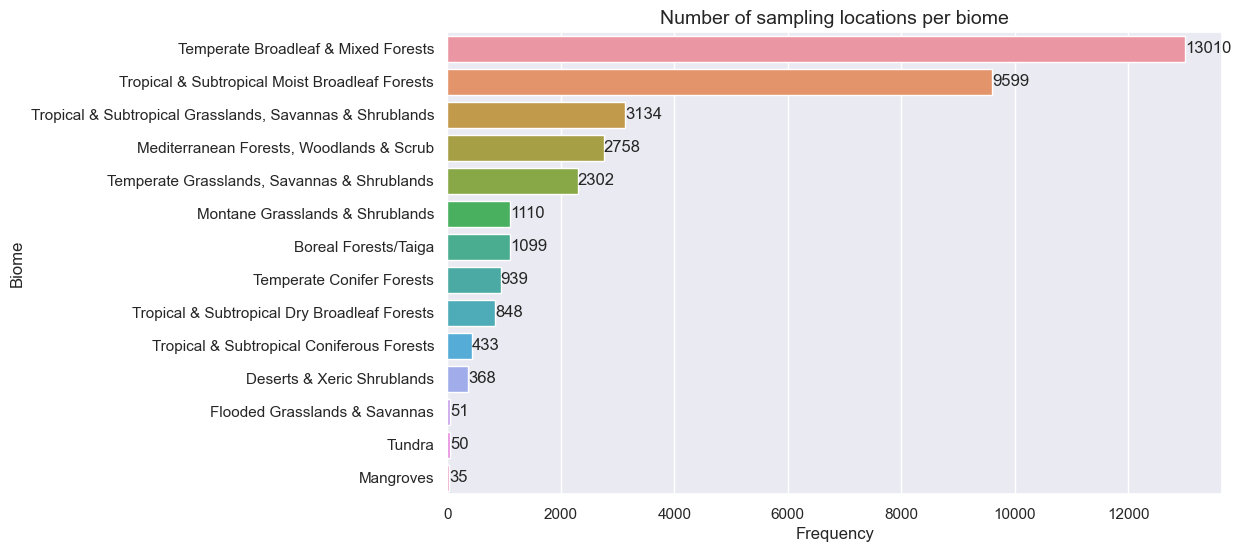

In [15]:
plot_frequencies(
    df_predicts,
    group_col="Biome",
    count_col="SSS",
    count_type="unique_values",
    title="Number of sampling locations per biome",
    sort_ascending=False,
    flip_axes=True,
)

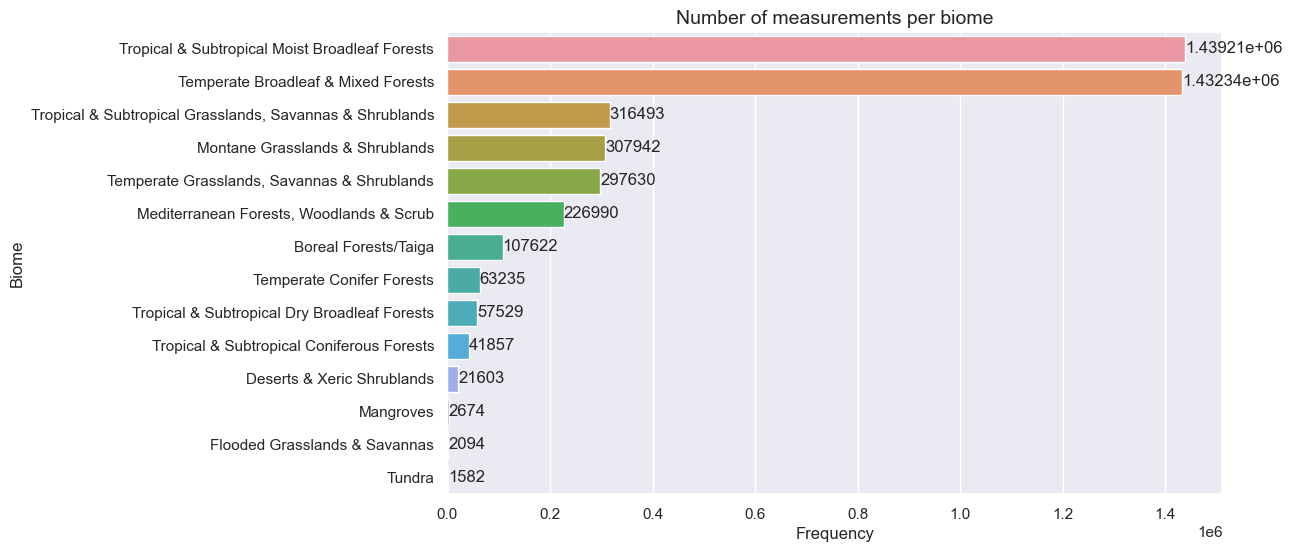

In [16]:
plot_frequencies(
    df_predicts,
    group_col="Biome",
    count_col="SSS",
    count_type="measurements",
    title="Number of measurements per biome",
    sort_ascending=False,
    flip_axes=True,
)

### Sites and measurements per UN subregion

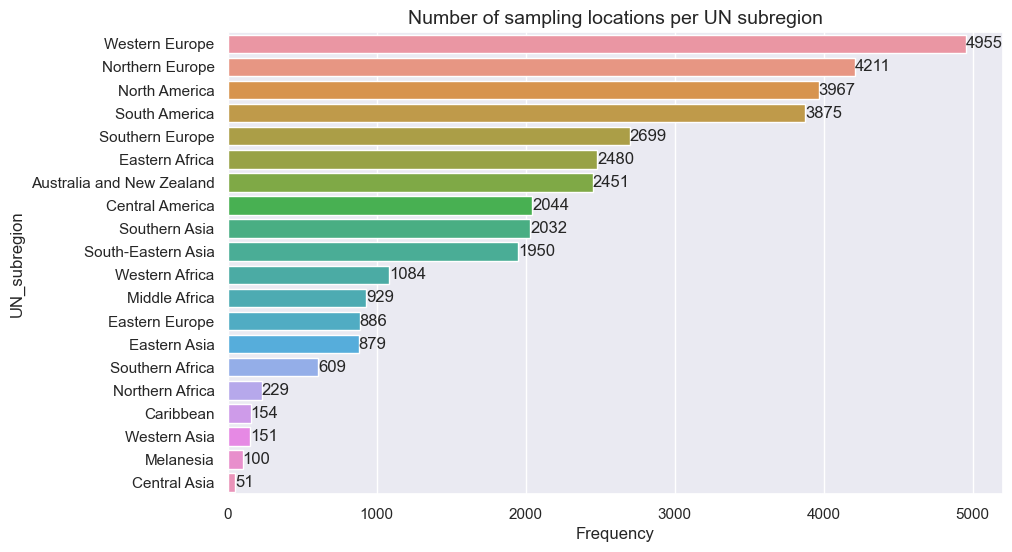

In [17]:
plot_frequencies(
    df_predicts,
    group_col="UN_subregion",
    count_col="SSS",
    count_type="unique_values",
    title="Number of sampling locations per UN subregion",
    sort_ascending=False,
    flip_axes=True,
)

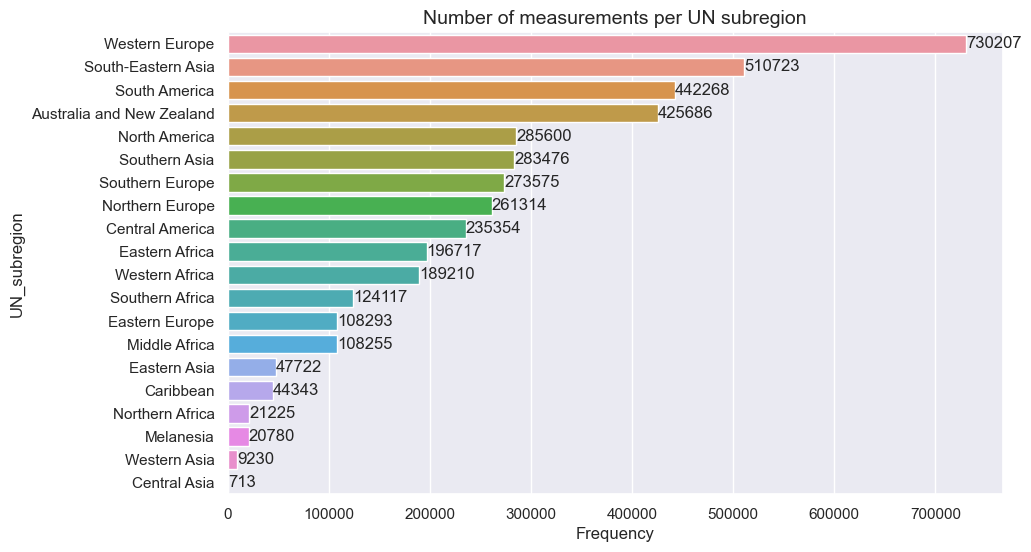

In [18]:
plot_frequencies(
    df_predicts,
    group_col="UN_subregion",
    count_col="SSS",
    count_type="measurements",
    title="Number of measurements per UN subregion",
    sort_ascending=False,
    flip_axes=True,
)

## Data analysis: Taxonomy

### Observations per Kingdom and Phylum

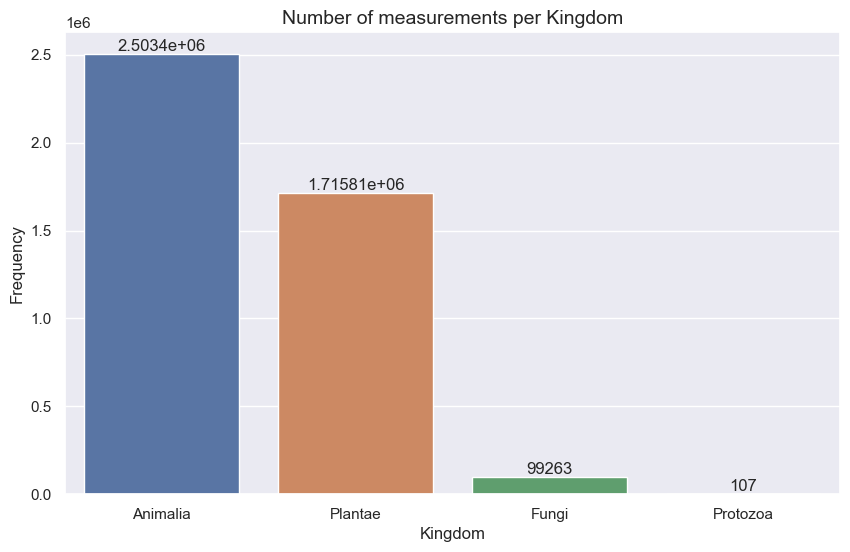

In [19]:
plot_frequencies(
    df_predicts,
    group_col="Kingdom",
    count_col="SSS",
    count_type="measurements",
    title="Number of measurements per Kingdom",
    sort_ascending=False,
    flip_axes=False,
)

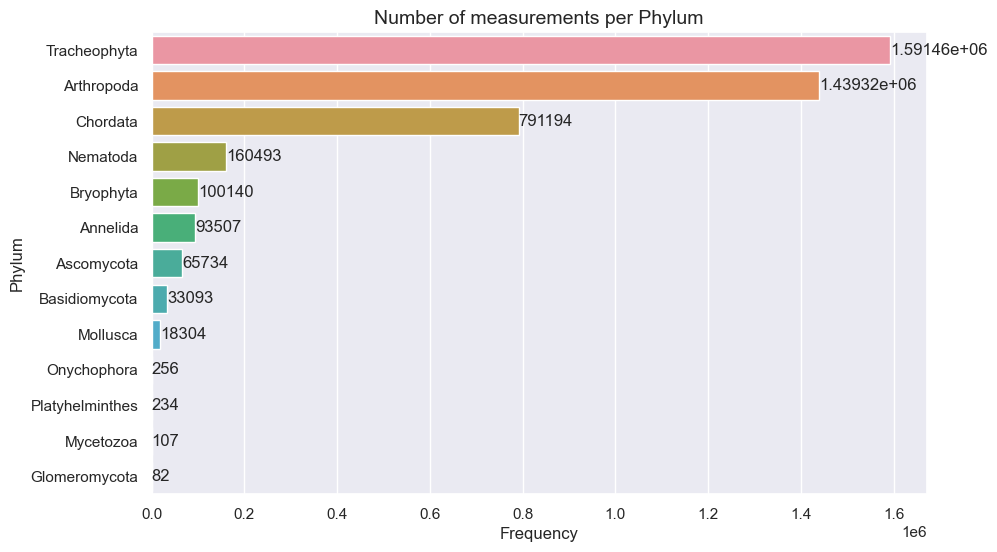

In [20]:
plot_frequencies(
    df_predicts,
    group_col="Phylum",
    count_col="SSS",
    count_type="measurements",
    title="Number of measurements per Phylum",
    sort_ascending=False,
    flip_axes=True,
)

### Deep dive: Sites and measurements for amphibians in Americas

In [21]:
# Filter dataframe for Americas and amphibians
df_americas_amph = df_predicts.loc[
    (df_predicts["UN_region"] == "Americas") & (df_predicts["Class"] == "Amphibia")
]

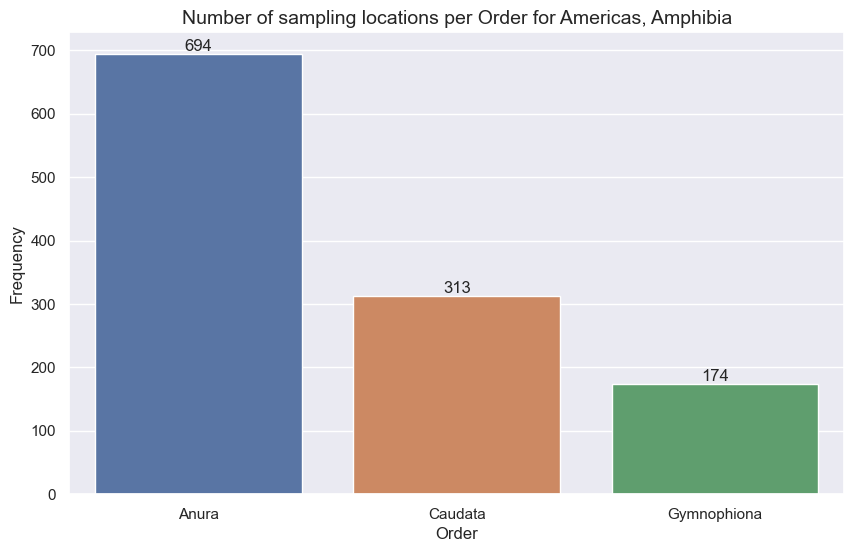

In [26]:
plot_frequencies(
    df_americas_amph,
    group_col="Order",
    count_col="SSS",
    count_type="unique_values",
    title="Number of sampling locations per Order for Americas, Amphibia",
    sort_ascending=False,
    flip_axes=False,
)

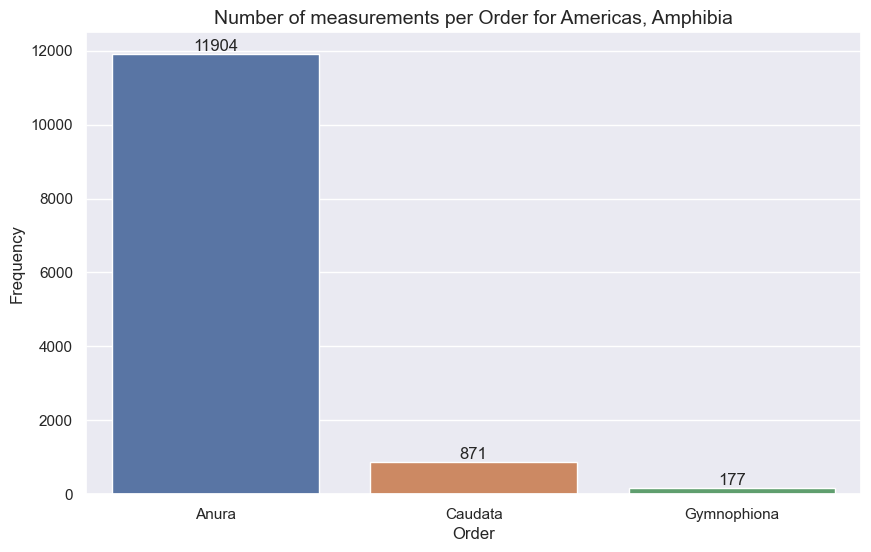

In [27]:
plot_frequencies(
    df_americas_amph,
    group_col="Order",
    count_col="SSS",
    count_type="measurements",
    title="Number of measurements per Order for Americas, Amphibia",
    sort_ascending=False,
    flip_axes=False,
)

In [ ]:
# TODO: Distribution / histograms of class, order, family, genus, species


## Data analysis: Diversity metric types and units

### Measurements per diversity metric and abundance unit type

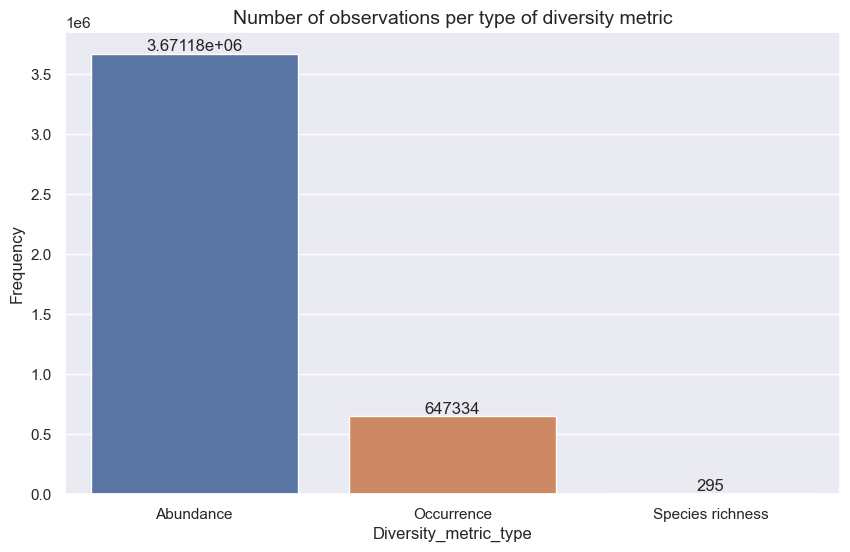

In [28]:
plot_frequencies(
    df_predicts,
    group_col="Diversity_metric_type",
    count_col="Site_number",
    count_type="measurements",
    title="Number of measurements per type of diversity metric",
    sort_ascending=False,
    flip_axes=False,
)

In [31]:
# Filter dataframe to only include abundance measurements
df_abundance = df_predicts.loc[df_predicts["Diversity_metric_type"] == "Abundance"]

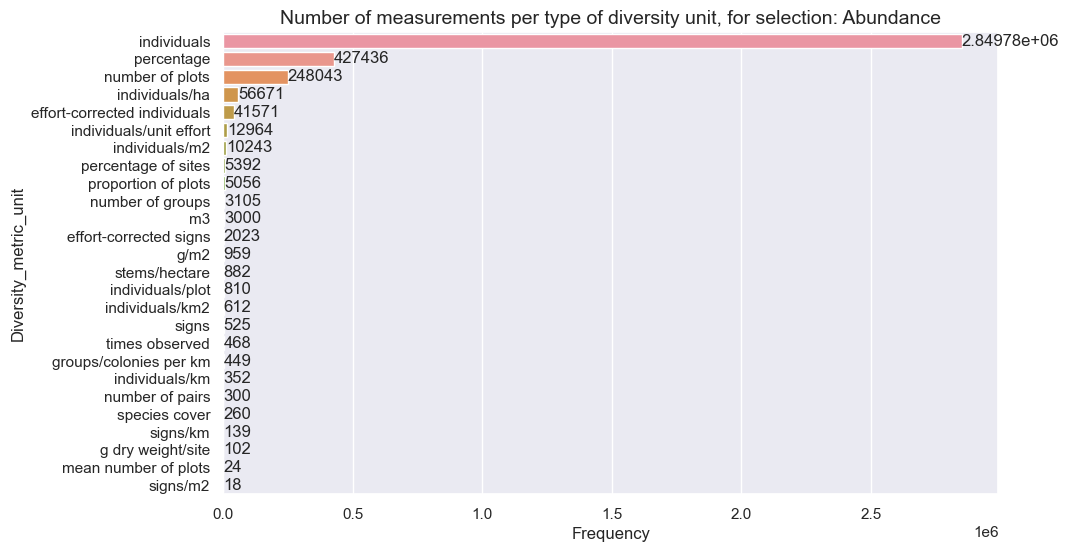

In [32]:
plot_frequencies(
    df_abundance,
    group_col="Diversity_metric_unit",
    count_col="Site_number",
    count_type="measurements",
    title="Number of measurements per type of diversity unit for Abundance",
    sort_ascending=False,
    flip_axes=True,
)

### Distribution of abundance data

In [155]:
# Filter dataframe to only include abundance given as count of individuals
df_abund_ind = df_predicts.loc[
    (df_predicts["Diversity_metric_type"] == "Abundance")
    & (df_predicts["Diversity_metric_unit"] == "individuals")
]

In [158]:
# Check some summary statistics of all the data
stats = ["mean", "median", "min", "max", "std"]
df_abund_ind["Measurement"].agg(stats)

mean          23.001581
median         0.000000
min            0.000000
max       394656.000000
std          575.448345
Name: Measurement, dtype: float64

In [159]:
# Do the same analysis, but averaged across sites
df_agg_stats = pd.DataFrame(
    df_abund_ind.groupby("SSS")["Effort_corrected_measurement"].agg(stats)
).reset_index()
df_agg_stats.drop("SSS", axis="columns").agg("mean")

mean       17.585171
median      1.519691
min         1.256337
max       842.852137
std        85.708034
dtype: float64

In [160]:
# Calculate total abundance for each site
df_ind_count_per_site = (
    pd.DataFrame(df_abund_ind.groupby("SSS")["Effort_corrected_measurement"].sum())
    .reset_index()
    .rename(columns={"Effort_corrected_measurement": "Tot_abundance"})
)

# Do log transformation of abundance numbers
df_ind_count_log = df_ind_count_per_site.copy()
mask = df_ind_count_log["Tot_abundance"] > 0
df_ind_count_log.loc[mask, "Tot_abundance"] = np.log(
    df_ind_count_log.loc[mask, "Tot_abundance"]
)

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


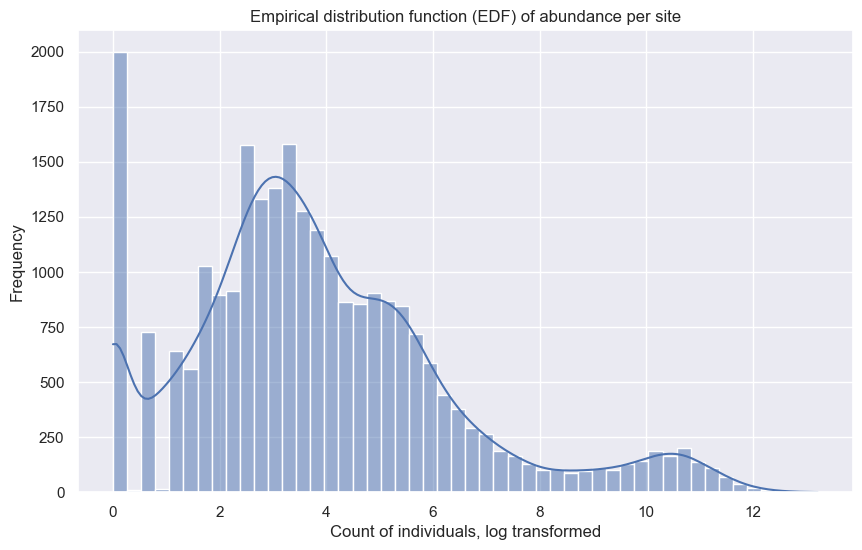

In [162]:
plot_histogram_with_density(
    df_ind_count_log,
    data_col="Tot_abundance",
    title="Empirical distribution function (EDF) of abundance per site",
    xlabel="Count of individuals, log transformed",
    bins=50,
    kde=True,
)

**Comment:** The log transformed count data follows a complex, multimodal distribution with three peaks: at zero, around 3 and around 11. The two density peaks at 3 and 11 can indicate differences in the taxonomic focus of different studies (with frequent and rarer species).

In [116]:
# Perform similar analysis, but instead of log transform, filter out large values
upper_lim = 100

# Filter data for upper limit
df_ind_count_lim = df_ind_count_per_site.copy()
mask = df_ind_count_lim["Tot_abundance"] <= upper_lim
df_ind_count_lim = df_ind_count_lim[mask]

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


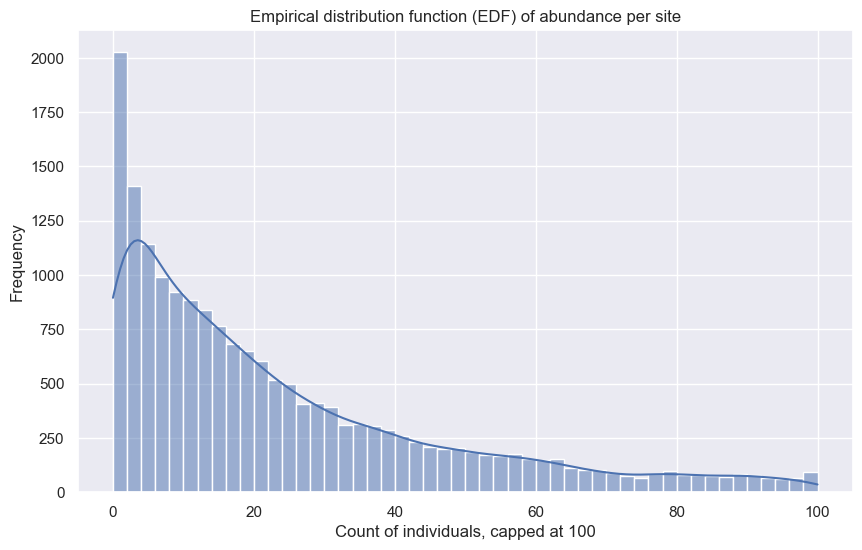

In [117]:
plot_histogram_with_density(
    df_ind_count_lim,
    data_col="Tot_abundance",
    title="Empirical distribution function (EDF) of abundance per site",
    xlabel=f"Count of individuals, capped at {upper_lim}",
    bins=50,
    kde=True,
)

**Comment:** Untransformed count data is approx Poisson, but possibly with a higher frequency of zeros than the standard model would assume. 

### Abundance data dispersion

In [118]:
# Calculate std-mean ratio
df_agg_stats_dropna = df_agg_stats.dropna(subset=["mean", "std"]).copy()
df_agg_stats_dropna["Std_mean_ratio"] = (
    df_agg_stats_dropna["std"] / df_agg_stats_dropna["mean"]
)

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


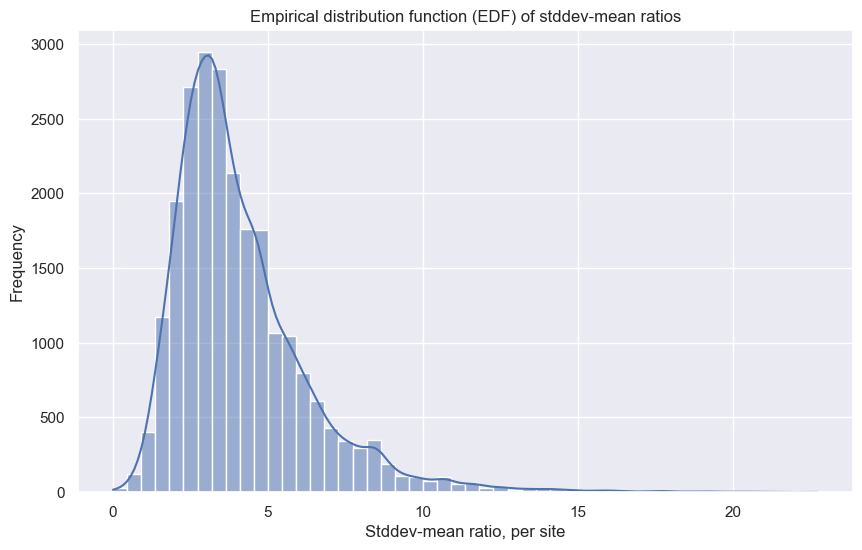

In [119]:
plot_histogram_with_density(
    df_agg_stats_dropna,
    data_col="Std_mean_ratio",
    title="Empirical distribution function (EDF) of stddev-mean ratios",
    xlabel="Stddev-mean ratio, per site",
    bins=50,
    kde=True,
)

**Comment:** If we compare to a Poisson model, which assumes equal mean and variance, the data is highly overdispersed. That would speak in favor for using a Negative-Binomial distribution for count data. Still there are a few instances where data is underdispersed. 

### Distribution of min-max scaled abundance data

In [129]:
# Calculate the total abundance for each site
df_study_site_abund = df_abundance.copy()
df_study_site_abund = (
    pd.DataFrame(df_study_site_abund.groupby(["SS", "SSS"])["Measurement"].sum())
    .reset_index()
    .rename(columns={"Measurement": "Site_abundance"})
)

In [131]:
# Calculate the max and min abundance within each study
df_study_min_max = (
    pd.DataFrame(
        df_study_site_abund.groupby("SS")["Site_abundance"].agg(["min", "max"])
    )
    .reset_index()
    .rename(columns={"min": "Min_abundance", "max": "Max_abundance"})
)

In [132]:
# Join the first and second dataframes on study
df_study_site_scaled = df_study_site_abund.join(
    df_study_min_max.set_index("SS"), on="SS", how="left", validate="m:1"
)

In [141]:
# Perform min-max scaling of site-level abundance
abund = df_study_site_scaled["Site_abundance"]
min_abund = df_study_site_scaled["Min_abundance"]
max_abund = df_study_site_scaled["Max_abundance"]
df_study_site_scaled["Abundance_min_max"] = (abund - min_abund) / (
    max_abund - min_abund
)

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


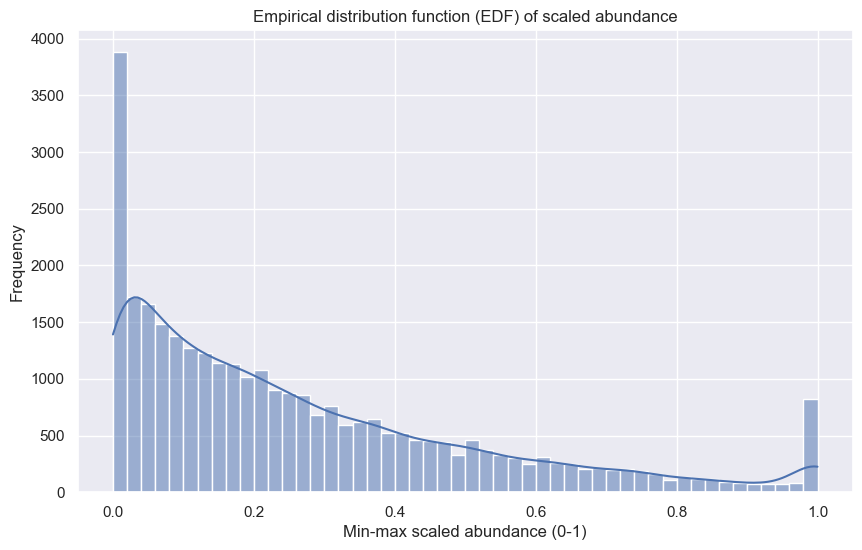

In [142]:
plot_histogram_with_density(
    df_study_site_scaled,
    data_col="Abundance_min_max",
    title="Empirical distribution function (EDF) of scaled abundance",
    xlabel="Min-max scaled abundance (0-1)",
    bins=50,
    kde=True,
)

**Comment:** Except for this density at 0 and 1, this distribution could potentially be approximated with a Beta distribution.

### Transformation of the scaled abundance

The authors of BII apply a square-root transformation to the scaled data, then assume that residuals are Gaussian. They also tried a log transformation. We compare both approaches below.

In [149]:
# Do square-root transformation of the scaled data
df_study_site_scaled["Min_max_sqrt"] = 0.0
mask = df_study_site_scaled["Abundance_min_max"] > 0

df_study_site_scaled.loc[mask, "Min_max_sqrt"] = np.sqrt(
    df_study_site_scaled.loc[mask, "Abundance_min_max"]
)

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


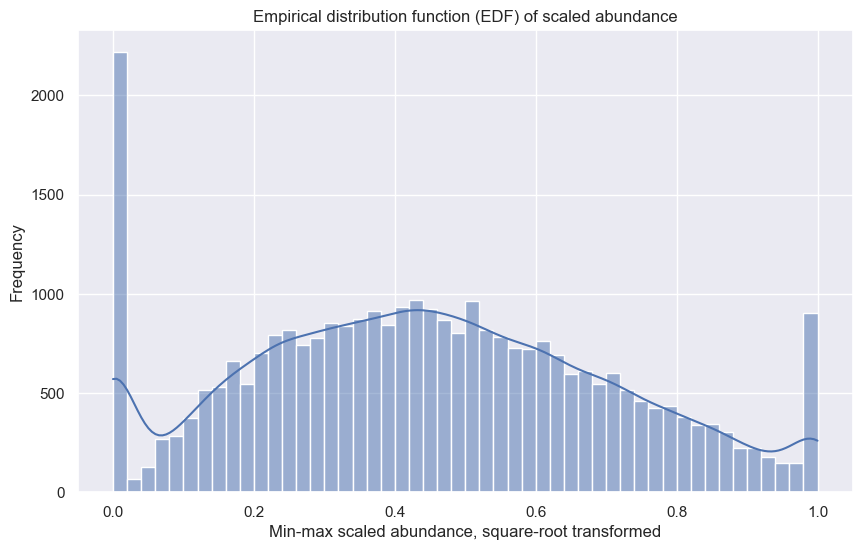

In [150]:
plot_histogram_with_density(
    df_study_site_scaled,
    data_col="Min_max_sqrt",
    title="Empirical distribution function (EDF) of scaled abundance",
    xlabel="Min-max scaled abundance, square-root transformed",
    bins=50,
    kde=True,
)

**Comment:** This could be approximated with a Beta or logit-Normal distribution, except for the density at 0 and 1. 

In [153]:
# Do log transformation of the scaled data
df_study_site_scaled["Min_max_log"] = 0.0
mask = df_study_site_scaled["Abundance_min_max"] > 0

df_study_site_scaled.loc[mask, "Min_max_log"] = np.log(
    df_study_site_scaled.loc[mask, "Abundance_min_max"]
)

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


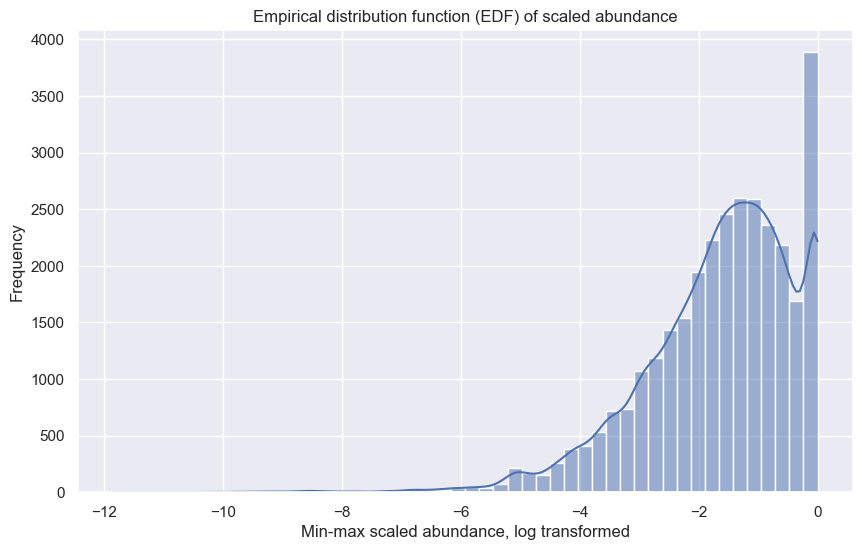

In [154]:
plot_histogram_with_density(
    df_study_site_scaled,
    data_col="Min_max_log",
    title="Empirical distribution function (EDF) of scaled abundance",
    xlabel="Min-max scaled abundance, log transformed",
    bins=50,
    kde=True,
)